first some EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

In [2]:
# now some popular regressions
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [3]:
#load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
features = pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')

In [4]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [26]:
#merge  stores with features
data = train.merge(features, on =['Store','Date'], how = 'inner').merge(stores, on =['Store'], how = 'inner')

In [9]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


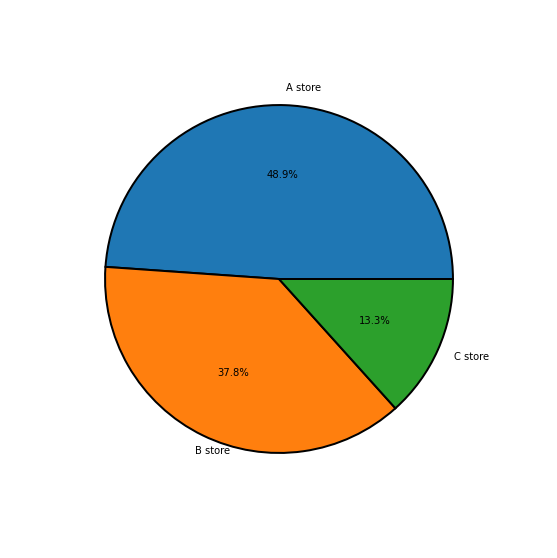

In [10]:
#looks liek there are 3 kinds of stores in type variables
sorted_type =stores.groupby('Type')
labels = ['A store', 'B store', 'C store']
sizes = sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
fig,axes = plt.subplots(1,1, figsize = (10,10))
wprops= {'edgecolor':'black', 'linewidth':2}
axes.pie(sizes, labels = labels, explode=(0.0,0,0),
        wedgeprops = wprops,
         radius= 0.8,
         autopct='%1.1f%%',
        center = (0.5,0.5))
plt.show()


In [11]:
sizes

[48.888888888888886, 37.77777777777778, 13.333333333333334]

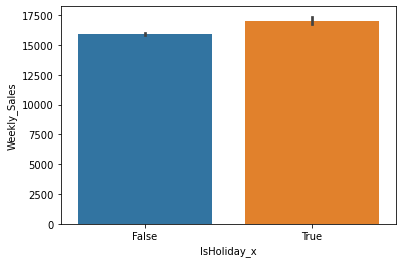

In [12]:
#to check weekl sales on holidays and non holidays
holiday = data['Weekly_Sales'].loc[data['IsHoliday_x']==True]
non_holiday= data['Weekly_Sales'].loc[data['IsHoliday_x']==False]

sns.barplot(x='IsHoliday_x', y= 'Weekly_Sales', data = data)

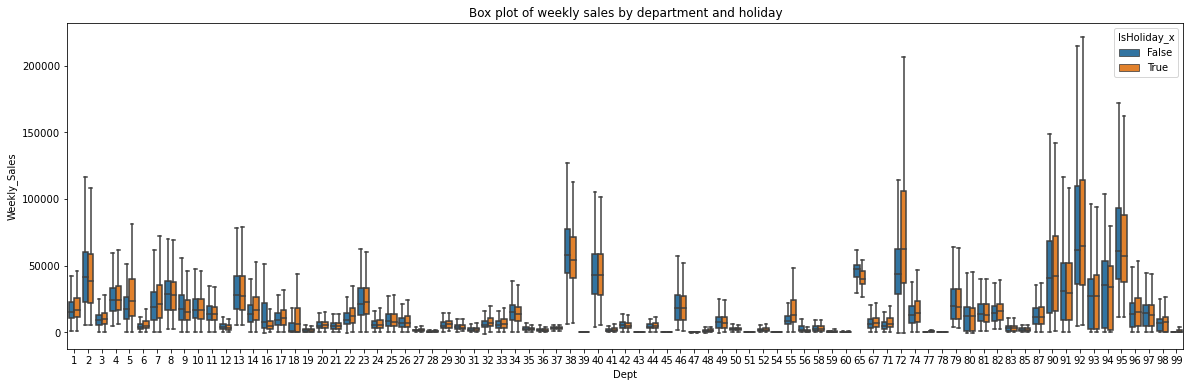

In [13]:
#box plot of weekly sales by Department and Holiday
data_l1 = pd.concat([data['Dept'], data['Weekly_Sales'], data['IsHoliday_x']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box plot of weekly sales by department and holiday')
fig = sns.boxplot(x = 'Dept', y= 'Weekly_Sales', data = data_l1,
                 showfliers=False, hue= 'IsHoliday_x')


In [14]:
# #monthly wise sales
# data_l4= pd.concat([data['Month'], data['Weeky_Sales'], data['IsHoliday_x']], axis  =1)
# plt.figure(figsize=(20,6))
# plt.title('Box pLot of weekly sales by monthly and holidays')
# fig = sns.boxplot(x ='Month',y='Weekly_Sales',data = data_l4,
#                   showFliers= False, hue = 'IsHoliday_x')


In [15]:
#now data preprocessing
data = data.fillna(0)
data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [16]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [17]:
# sales can't be negeative so we skip those
data= data[data['Weekly_Sales']>=0]

In [18]:
data.corr()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size
Store,1.000000,0.024236,-0.085099,-0.000511,-0.050226,0.065296,-0.059948,-0.033727,-0.020299,-0.042792,-0.012595,-0.211240,0.208753,-0.000511,-0.182784
Dept,0.024236,1.000000,0.148704,0.000662,0.004718,0.003543,0.001444,0.000428,0.001514,0.001872,0.002754,-0.007172,0.007785,0.000662,-0.002471
Weekly_Sales,-0.085099,0.148704,1.000000,0.012856,-0.002333,0.000092,0.047260,0.020961,0.038530,0.037481,0.050612,-0.021153,-0.025831,0.012856,0.244089
IsHoliday_x,-0.000511,0.000662,0.012856,1.000000,-0.155779,-0.078140,-0.003522,0.207314,0.266718,0.011621,-0.015189,-0.001946,0.010540,1.000000,0.000786
Temperature,-0.050226,0.004718,-0.002333,-0.155779,1.000000,0.143718,-0.026426,-0.179669,-0.056010,-0.050310,-0.014836,0.182191,0.096792,-0.155779,-0.058414
Fuel_Price,0.065296,0.003543,0.000092,-0.078140,0.143718,1.000000,0.297084,0.029288,0.018645,0.166654,0.215597,-0.164207,-0.033897,-0.078140,0.003620
MarkDown1,-0.059948,0.001444,0.047260,-0.003522,-0.026426,0.297084,1.000000,0.175019,-0.014422,0.838862,0.415287,0.010927,-0.105259,-0.003522,0.169876
MarkDown2,-0.033727,0.000428,0.020961,0.207314,-0.179669,0.029288,0.175019,1.000000,-0.006088,0.113458,0.131853,-0.003685,-0.041504,0.207314,0.078387
MarkDown3,-0.020299,0.001514,0.038530,0.266718,-0.056010,0.018645,-0.014422,-0.006088,1.000000,-0.012029,0.042544,-0.005958,-0.018080,0.266718,0.033670
MarkDown4,-0.042792,0.001872,0.037481,0.011621,-0.050310,0.166654,0.838862,0.113458,-0.012029,1.000000,0.303553,-0.002050,-0.076589,0.011621,0.127411


# so we use time series model since the given data set is  a time series
1 Arima -> Auto regressive intergrated moving average model
it is   a forecasting technique  that projects the future values of a series based entirely on its own inertia
### steps
load the data<br>
visualize the available univariate  data in timely fashion<br>
 look at the seasonal  decomposition  parameter  to check for the seasonality <br>trend etc are available or not<br>
 perform a test of stationarity using one of the  time series  stationarity methods<br>
 if the time series is not sationary make it <br>
 split the univariate  data in train and test<br>
most important to find the appripriate values of triplet  p, d , q -> p auto regressors d  integration or difference  q is number of moving average  by plotting   ACF and  PACF graphs<br>
after value fit ARIMA model in train data<br>
forecast the test data values  and plot the visualization of train, test  and predicted test  on single graph<br>

calculate RMSE  on predicted values<br>



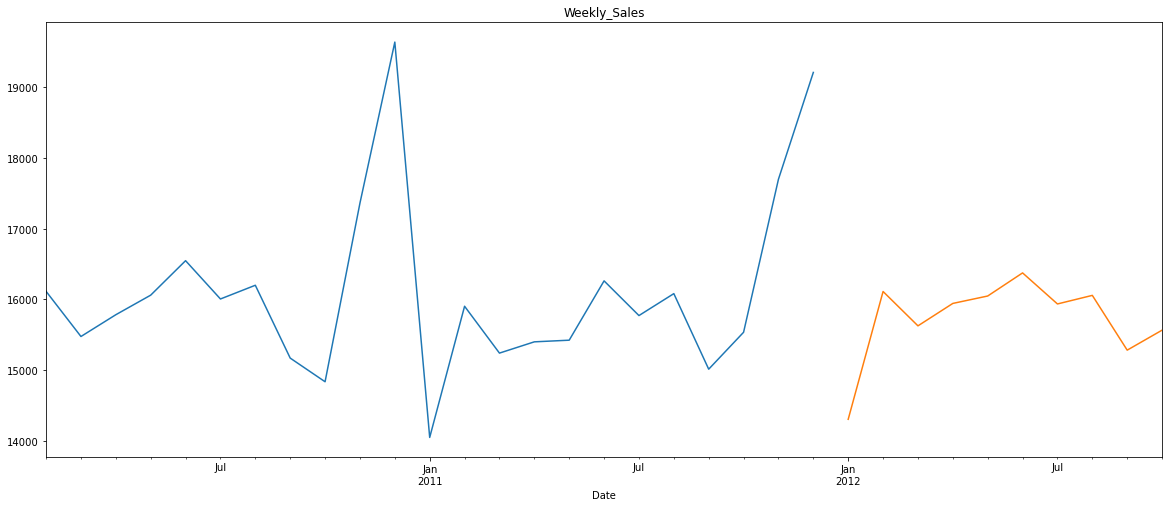

In [19]:
#arima and holt winters models take univariate models into consideration
data.Date = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis = 1)


data = data.resample('MS').mean()  #resampling data with month starting  first
# train test split
train_data= data[:int(0.7*len(data))]
test_data= data[int(0.7*len(data)):]

#since arima takes univariate data

train_data = train_data['Weekly_Sales']
test_data= test_data['Weekly_Sales']


#plotting the data


train_data.plot(figsize=(20,8), title= 'Weekly_Sales',)
test_data.plot(figsize=(20,8))
plt.show()


##### the time series model asssums that the given  time series data set in stationary meaning it has got the constant meand and constan t variance

### if the data is set non stattionary then   we don't apply the time series modls to the data  as is.
### we apply Dicky FUller  test to check whether the series is stationary or not


it tests the null hypothesis that a unit root is present in a time series data
more clearly it checks for  stationarity and non stationarity data
the test is trying to reject the null hypothesis that the unit root exists and  data is non stationary
<br>
if the null hypothesis is rejected then the data can be considered valid
<br>
when we run the test, we'll get an ADF value  and a p- value 
ADF should be negative  and p should be below some threshold
so if p if greater than 0.0.5 then  we say we fail to reject the null hypothesis  because the data is a unit root and is non stationary


In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Weekly_Sales'])
print('ADF Statistics: {}'.format(result[0]))
print('p value is {}'.format(result[1]))
print('critical values are')
for key,value in  result[4].items():
    print('\t{}:'.format(key,value))

ADF Statistics: -4.173916935101503
p value is 0.0007291844915317363
critical values are
	1%:
	5%:
	10%:


holtwinters method
it is  a time series model and is a way to model three aspects of the  time series, a typical value (average) , a slope (trend) over time and a cyclical repeating pattern(seasonality)
it uses a exponential smoothing  to encode lots of values  from the past and use them to predict "typical"   values  for the present and future


#### steps
load the data<br>
visualize the available  univariate data in timely fashion<br>
fit the model  using holt winters method on train data<br>
predict the values <br>
visualize the training data , test data  and predicted  data on single graph<br>
calculate  RMSE on predicted data<br>


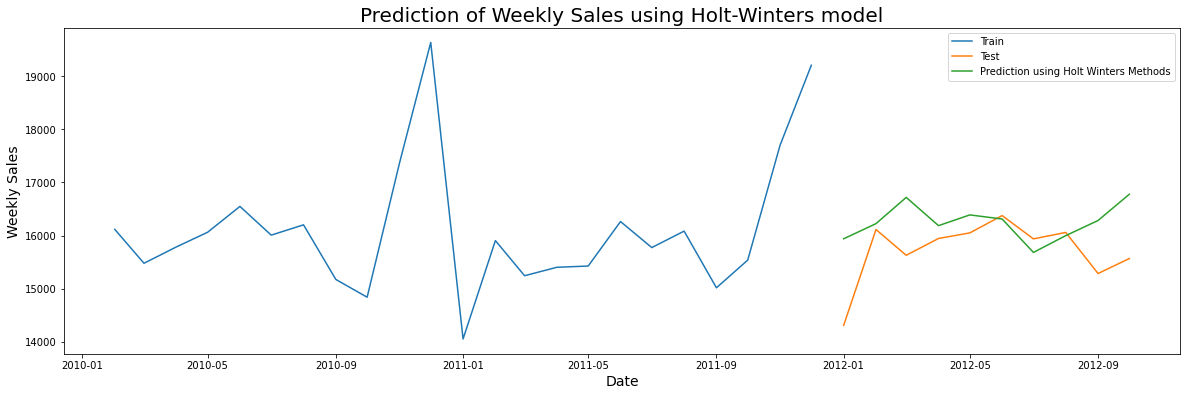

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing  #smooths out level, trend and seasonality exponentially
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=7, trend='additive', seasonal='additive').fit() 
pred = model_holt_winters.forecast(len(test_data))# Predict the test data
#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [22]:
#performance metrics
print("MSE", mean_squared_error(test_data,pred))
print("RMSE", math.sqrt(mean_squared_error(test_data,pred)))
print('MAD', mean_absolute_error(test_data,pred))


MSE 658969.440361476
RMSE 811.7693270637146
MAD 601.0603637923869


before aplying model w e need the data to be numeric 

In [ ]:
data
train_data= data[:int(0.7*len(data))]
test_data= data[int(0.7*len(data)):]

In [29]:
train_data = [train]
#converting categorical to numerical value
# type_mapping={"A":1,"B":2,"C":3}
# for data in train_data:
#     data['Type'] = data['Type'].map(type_mapping)
type_mapping = {False:0 ,True:1}
for data in train_data:
    data['IsHoliday'] = data["IsHoliday"].map(type_mapping)
    


In [30]:

train['Super_Bowl'] = np.where(
(train['Date']==datetime(2010,2,10))|
(train['Date'] == datetime(2011,2,11))| 
(train['Date'] == datetime(2012,2,10))|
(train['Date'] == datetime(2013,2,8)), 1, 0)
train['Labor_day'] = np.where(
(train['Date'] == datetime(2010,9,10))|
(train['Date'] == datetime(2011,9,9))| 
(train['Date'] == datetime(2012,9,7))|
(train['Date'] == datetime(2013,9,6)), 1, 0)
train['Thanksgiving'] = np.where(
(train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | 
(train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where(
(train['Date']==datetime(2010, 12, 31))| (train['Date']==datetime(2011, 12, 30))| 
(train['Date']==datetime(2012, 12, 28))| (train['Date']==datetime(2013, 12, 27)),1,0)

In [31]:
train = train.sort_values(by='Date', ascending=True) # Sorting the data in increasing order of Date and then splitting.
y = train['Weekly_Sales']
X = train.drop(['Weekly_Sales'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3) #Train:CV = 70:30 splitting.

In [32]:
def wmae_train(test, pred): 
    weights = X_train['IsHoliday'].apply(lambda is_holiday:5 if   is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error
def wmae_cv(test, pred): # WMAE for CV
    weights = X_cv['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [33]:
# Define the list of errors and list of hyper parameters.
error_cv_rf = []
error_train_rf = []
max_depth = [1,5,10,15,20,25,30,35]
n_estimators = [10,20,30,40,50,60,70,80]
rf_hyperparams = []
"""Calculating train and CV errors for maximum depth and number of estimators parameters."""
for i in max_depth: 
    for j in n_estimators: 
        rf = RandomForestRegressor(max_depth=i, n_estimators=j) 
        rf.fit(X_train, y_train) 
        y_pred_cv_rf = rf.predict(X_cv) 
        y_pred_train_rf = rf.predict(X_train) 
        error_cv_rf.append(wmae_cv(y_cv, y_pred_cv_rf)) 
        error_train_rf.append(wmae_train(y_train, y_pred_train_rf)) 
        rf_hyperparams.append({'Maximum Depth':i, 'No. of Estimators':j}) 

ValueError: could not convert string to float: '2010-09-03'

In [34]:
rf_dataframe = pd.DataFrame(rf_hyperparams)
rf_dataframe['Train Error']=error_train_rf
rf_dataframe['CV Error']=error_cv_rf
rf_dataframe.sort_values(by=['CV Error'], ascending=True)
rf_dataframe.head()

,Train Error,CV Error
